<a href="https://colab.research.google.com/github/AtharvaGhodki/Text-Doc-Semantic-Similarity/blob/main/Text_Doc_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df=pd.read_csv('Text_Similarity.csv')

In [ ]:
df.head()

,text1,text2,similarity
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,0.086190
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,0.165480
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,0.077801
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,0.000900
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,0.088690


In [ ]:
df_=df

In [ ]:
import string,time
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude=string.punctuation
def stripunc(data):
    for char in exclude:
        data = data.replace(char,'')
    return data

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def compute(sent):

    sent = decontracted(sent)
    sent = stripunc(sent)

    words=word_tokenize(str(sent.lower()))

    #Removing all single letter and and stopwords from question
    sent1=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1))
    sent2=' '.join(str(j) for j in words if j not in stop_words and (len(j)!=1))
    return sent1, sent2

In [ ]:
train_data=df

In [ ]:
train_data.shape

(3000, 3)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
clean_stemmed_text1 = []
clean_stemmed_text2 = []
clean_text1 = []
clean_text2 = []
combined_stemmed_text = []
for _, row in tqdm(train_data.iterrows()):
    cstext1, ctext1 = compute(row['text1'])
    cstext2, ctext2 = compute(row['text2'])
    clean_stemmed_text1.append(cstext1)
    clean_text1.append(ctext1)
    clean_stemmed_text2.append(cstext2)
    clean_text2.append(ctext2)
    combined_stemmed_text.append(cstext1+" "+cstext2)

3000it [00:35, 83.98it/s] 


In [ ]:
print(len(clean_stemmed_text1))
print(len(clean_stemmed_text2))
print(len(clean_text1))
print(len(clean_text2))
print(len(combined_stemmed_text))

3000
3000
3000
3000
3000


In [ ]:
train_data['clean_stemmed_text1'] = clean_stemmed_text1
train_data['clean_stemmed_text2'] = clean_stemmed_text2
train_data['clean_text1'] = clean_text1
train_data['clean_text2'] = clean_text2
train_data['combined_stemmed_text'] = combined_stemmed_text

In [ ]:
train_data.head()

,text1,text2,similarity,clean_stemmed_text1,clean_stemmed_text2,clean_text1,clean_text2,combined_stemmed_text
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,0.086190,broadband challeng tv view number european bro...,garden win doubl glasgow britain jason garden ...,broadband challenges tv viewing number europea...,gardener wins double glasgow britain jason gar...,broadband challeng tv view number european bro...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,0.165480,rap boss arrest drug find rap mogul marion sug...,amnesti chief lament war failur lack public ou...,rap boss arrested drug find rap mogul marion s...,amnesty chief laments war failure lack public ...,rap boss arrest drug find rap mogul marion sug...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,0.077801,player burnout worri robinson england coach an...,hank greet wintri premier hollywood star tom h...,player burnout worries robinson england coach ...,hanks greeted wintry premiere hollywood star t...,player burnout worri robinson england coach an...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,0.000900,heart oak 32 cotonsport heart oak set ghanaian...,redford vision sundanc despit sport corduroy c...,hearts oak 32 cotonsport hearts oak set ghanai...,redford vision sundance despite sporting cordu...,heart oak 32 cotonsport heart oak set ghanaian...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,0.088690,sir paul rock super bowl crowd sir paul mccart...,mauresmo open victori la ameli mauresmo maria ...,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens victory la amelie mauresmo mari...,sir paul rock super bowl crowd sir paul mccart...


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(train_data[['clean_text1', 'clean_text2']], train_data['similarity'], test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
X_train.head()

,clean_text1,clean_text2
1221,tindall wants second opinion england centre mi...,england 1718 france england suffered eighth de...
1651,antispam screensaver scrapped contentious camp...,gritty return prince persia still basking rela...
1460,russia gets investment blessing soaring oil sa...,landmark movies 2004 hailed us film profession...
1081,celtic make late bid bellamy newcastle striker...,profits stall china lenovo profits chinese com...
1405,vera drake scoops film award oscar hopefuls mi...,firefox browser takes microsoft microsoft inte...


In [ ]:
X_train['text'] = X_train[['clean_text1','clean_text2']].apply(lambda x:str(x[0])+" "+str(x[1]), axis=1)

In [ ]:
X_train.head()

,clean_text1,clean_text2,text
1221,tindall wants second opinion england centre mi...,england 1718 france england suffered eighth de...,tindall wants second opinion england centre mi...
1651,antispam screensaver scrapped contentious camp...,gritty return prince persia still basking rela...,antispam screensaver scrapped contentious camp...
1460,russia gets investment blessing soaring oil sa...,landmark movies 2004 hailed us film profession...,russia gets investment blessing soaring oil sa...
1081,celtic make late bid bellamy newcastle striker...,profits stall china lenovo profits chinese com...,celtic make late bid bellamy newcastle striker...
1405,vera drake scoops film award oscar hopefuls mi...,firefox browser takes microsoft microsoft inte...,vera drake scoops film award oscar hopefuls mi...


In [ ]:
import tensorflow as tf
import keras
import keras.backend as K

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from keras.layers import Input, Concatenate, Flatten, Dense, Embedding, LSTM
from keras.models import Model

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train['text'].values)

In [ ]:
X_train['clean_text1'] = X_train['clean_text1'].astype(str)
X_train['clean_text2'] = X_train['clean_text2'].astype(str)

In [ ]:
X_val['clean_text1'] = X_val['clean_text1'].astype(str)
X_val['clean_text2'] = X_val['clean_text2'].astype(str)

X_test['clean_text1'] = X_test['clean_text1'].astype(str)
X_test['clean_text2'] = X_test['clean_text2'].astype(str)

In [ ]:
train_text1_seq = t.texts_to_sequences(X_train['clean_text1'].values)
train_text2_seq = t.texts_to_sequences(X_train['clean_text2'].values)
val_text1_seq = t.texts_to_sequences(X_val['clean_text1'].values)
val_text2_seq = t.texts_to_sequences(X_val['clean_text2'].values)
test_text1_seq = t.texts_to_sequences(X_test['clean_text1'].values)
test_text2_seq = t.texts_to_sequences(X_test['clean_text2'].values)

In [ ]:
len_vec_1 = [len(sent_vec) for sent_vec in train_text1_seq]

In [ ]:
np.max(len_vec_1)

1687

<ipython-input-30-863872957171>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(len_vec_1)


<Axes: ylabel='Density'>

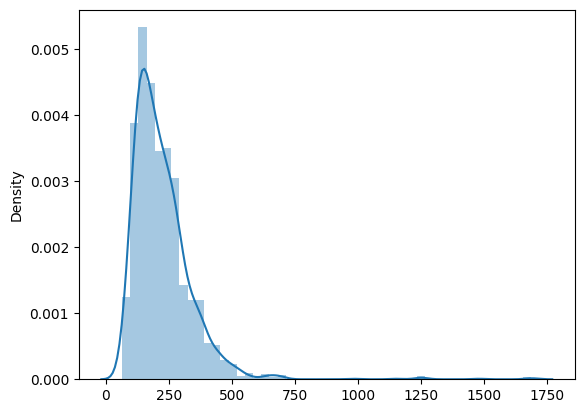

In [ ]:
sns.distplot(len_vec_1)

In [ ]:
len_vec_2 = [len(sent_vec) for sent_vec in train_text2_seq]

In [ ]:
np.max(len_vec_2)

2206

<ipython-input-33-1a2ad05cadd2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(len_vec_2)


<Axes: ylabel='Density'>

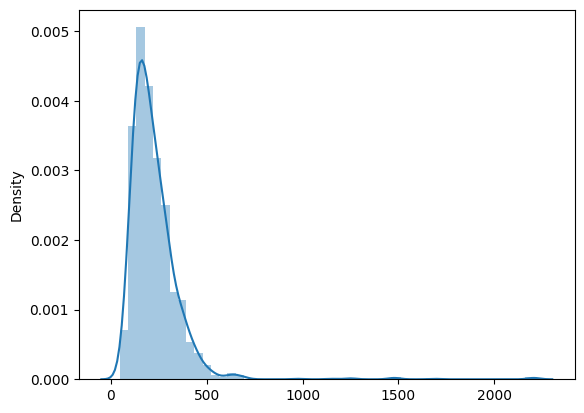

In [ ]:
sns.distplot(len_vec_2)

In [ ]:
max_len=650

In [ ]:
train_text1_seq = pad_sequences(train_text1_seq, maxlen=max_len, padding='post')
train_text2_seq = pad_sequences(train_text2_seq, maxlen=max_len, padding='post')
test_text1_seq = pad_sequences(test_text1_seq, maxlen=max_len, padding='post')
test_text2_seq = pad_sequences(test_text2_seq, maxlen=max_len, padding='post')
val_text1_seq = pad_sequences(val_text1_seq, maxlen=max_len, padding='post')
val_text2_seq = pad_sequences(val_text2_seq, maxlen=max_len, padding='post')


In [ ]:
print(len(train_text1_seq[0]))

650


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-07-17 10:16:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-07-17 10:16:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-07-17 10:16:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embeddings_index = {}
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
len(embeddings_index['tree'])

300

In [ ]:
not_present_list = []
vocab_size = len(t.word_index) + 1
print('Loaded %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, len(embeddings_index['no'])))
for word, i in t.word_index.items():
    if word in embeddings_index.keys():
        embedding_vector = embeddings_index.get(word)
    else:
        not_present_list.append(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.zeros(300)

Loaded 400000 word vectors.


In [ ]:
embedding_matrix.shape

(27122, 300)

In [ ]:
len(t.word_index)

27121

In [ ]:
len(not_present_list)

3480

In [ ]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.layers import Input, Dense, Flatten, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract, Add

In [ ]:
from keras import backend as K

def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

In [ ]:
#from sklearn.metrics import roc_auc_score

#def auroc(y_true, y_pred):
#   return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [ ]:
print((train_text1_seq.shape))

(1920, 650)


In [ ]:
input_1 = Input(shape=(train_text1_seq.shape[1],))
input_2 = Input(shape=(train_text2_seq.shape[1],))
common_embed = Embedding(name="synopsis_embedd",input_dim =len(t.word_index)+1,
                       output_dim=len(embeddings_index['no']),weights=[embedding_matrix],
                       input_length=train_text1_seq.shape[1],trainable=False)
lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)

common_lstm = LSTM(64,return_sequences=True, activation="relu")
vector_1 = common_lstm(lstm_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(lstm_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x3 = Multiply()([x3, x3])
x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])
x4 = Subtract()([x1_, x2_])

x5 = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([vector_1, vector_2])

conc = Concatenate(axis=-1)([x5,x4, x3])

x = Dense(100, activation="relu", name='conc_layer')(conc)
x = Dropout(0.01)(x)
out = Dense(1, activation="sigmoid", name = 'out')(x)

model = Model([input_1, input_2], out)

model.compile(loss="binary_crossentropy", optimizer=Adam(0.00001))


In [ ]:
model.fit([train_text1_seq,train_text2_seq],y_train.values.reshape(-1,1), epochs = 5,batch_size=64,validation_data=([val_text1_seq, val_text2_seq],y_val.values.reshape(-1,1)))

Epoch 1/5
30/30 [==============================] - 75s 2s/step - loss: 0.5691 - val_loss: 0.4701
Epoch 2/5
30/30 [==============================] - 62s 2s/step - loss: 0.4265 - val_loss: 0.4030
Epoch 3/5
30/30 [==============================] - 65s 2s/step - loss: 0.3881 - val_loss: 0.3911
Epoch 4/5
30/30 [==============================] - 62s 2s/step - loss: 0.3773 - val_loss: 0.3858
Epoch 5/5
30/30 [==============================] - 60s 2s/step - loss: 0.3712 - val_loss: 0.3823


In [ ]:
y_pred=model.predict([test_text1_seq,test_text2_seq])


19/19 [==============================] - 10s 505ms/step


In [ ]:
y_pred

array([[0.1581433 ],
       [0.06457537],
       [0.07606106],
       [0.10917015],
       [0.11033043],
       [0.07137232],
       [0.098887  ],
       [0.11117259],
       [0.10751624],
       [0.09117734],
       [0.08526909],
       [0.19531561],
       [0.11641086],
       [0.16386878],
       [0.12349001],
       [0.12541023],
       [0.10566409],
       [0.14094256],
       [0.095479  ],
       [0.13590449],
       [0.2233292 ],
       [0.17118359],
       [0.09255998],
       [0.08092932],
       [0.17670712],
       [0.05722627],
       [0.09287102],
       [0.08821164],
       [0.11687239],
       [0.21944594],
       [0.15409352],
       [0.1618988 ],
       [0.21325774],
       [0.13021362],
       [0.14026757],
       [0.18747133],
       [0.06866924],
       [0.11169073],
       [0.12675788],
       [0.09933858],
       [0.12990391],
       [0.17262095],
       [0.14469267],
       [0.11516327],
       [0.13625948],
       [0.15047906],
       [0.10570736],
       [0.211

In [ ]:
predicted_values = np.array(y_pred)
true_values = np.array(y_test)

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predicted_values - true_values))

# Calculate the accuracy
accuracy = 1 - mae

print(f"Accuracy: {accuracy}")

Accuracy: 0.904316229376389
